In [1]:
from qiskit import pulse, transpile, assemble, schedule, IBMQ, quantum_info as qi
import qiskit
from qiskit_experiments.library.characterization import CrossResonanceHamiltonian
import numpy as np

In [2]:
account_provider = IBMQ.load_account()
provider_opts = {'hub': 'ibm-q-ncsu', 'group': 'nc-state', 'project':'noiseanderror'}

In [3]:
# target backend
backend_name = 'ibm_lagos'

In [4]:
provider = IBMQ.get_provider(**provider_opts)
backend = provider.get_backend(backend_name)

In [5]:
# backend information
config = backend.configuration()
defaults = backend.defaults()
properties = backend.properties()

In [6]:
inst_map = defaults.instruction_schedule_map

In [12]:
cr_times = 16*np.linspace(0, 500, 21)
print(cr_times)

[   0.  400.  800. 1200. 1600. 2000. 2400. 2800. 3200. 3600. 4000. 4400.
 4800. 5200. 5600. 6000. 6400. 6800. 7200. 7600. 8000.]


In [13]:
expr = CrossResonanceHamiltonian(
            qubits=(0, 1),
            flat_top_widths=cr_times,
            unit="dt",
            amp=0.1,
            sigma=64,
            risefall=2,
            backend=backend,
        )

In [14]:
circuits = expr.circuits()

In [15]:
hamiltonian_data = expr.run(backend=backend, shots=1000).block_for_results()

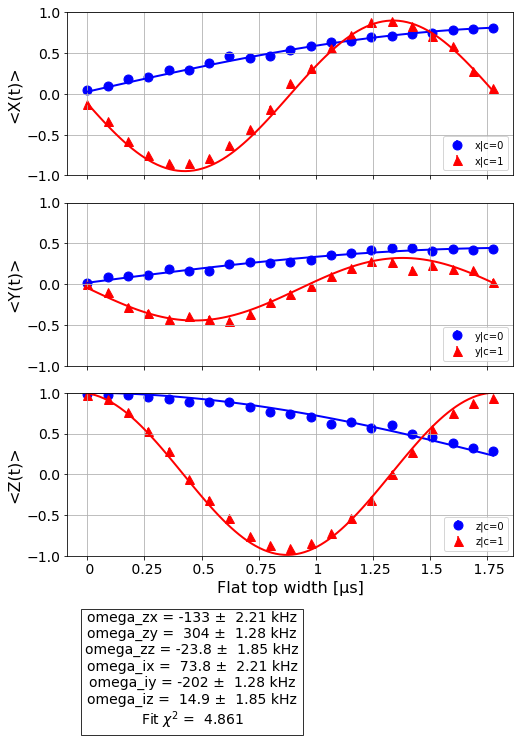

In [18]:
hamiltonian_data.figure(0)

In [19]:
print(hamiltonian_data.analysis_results())

[DbAnalysisResultV1(name=@Parameters_CrossResonanceHamiltonianAnalysis, value=FitVal(value=array([ 3.79393590e-08, -3.73796440e+05,  1.30145134e+06,  6.37622769e+05,
       -3.17715112e+06, -5.61873057e+04,  2.42936755e+05,  1.99542291e-03]), stderr=array([3.33887193e-09, 7.14135072e+03, 2.69074854e+04, 5.82137554e+03,
       1.49720062e+04, 1.29714800e+04, 1.92992317e+04, 2.12727820e-03]), unit=None), device_components=[<Qubit(Q0)>, <Qubit(Q1)>], experiment_id=c5822665-6190-44b4-a22d-5a8507a3859f, result_id=b11da461-a5bf-4357-b86a-a5e72b39de6a, chisq=4.861494618578046, quality=bad, verified=False, extra={'popt_keys': ['t_off', 'px0', 'px1', 'py0', 'py1', 'pz0', 'pz1', 'b'], 'dof': 118, 'covariance_mat': array([[ 1.11480658e-17,  2.17943329e-06, -1.10031635e-05,
        -4.96218382e-06,  2.99095666e-05, -4.94996741e-06,
         1.30605471e-05,  2.31264961e-12],
       [ 2.17943329e-06,  5.09988901e+07, -3.27073172e+06,
        -4.03017177e+06,  4.41400854e+06,  3.76855165e+07,
       

In [9]:
cx_sched = inst_map.get('cx', qubits=[0,1])

()
Schedule((0, ShiftPhase(1.5707963267948966, DriveChannel(0))), (0, ShiftPhase(1.5707963267948966, ControlChannel(1))), (0, Play(Drag(duration=160, amp=(-3.5135926015694804e-17-0.19127107255282533j), sigma=40, beta=-1.1060922863370188, name='Ym_d0'), DriveChannel(0), name='Ym_d0')), (0, Play(Drag(duration=160, amp=(0.0969041209298364+0.0008960652620970415j), sigma=40, beta=-1.4266716117122862, name='X90p_d1'), DriveChannel(1), name='X90p_d1')), (160, Play(GaussianSquare(duration=528, amp=(0.0595338949999778+0.00036761959317131796j), sigma=64, width=272, name='CR90p_d1_u0'), DriveChannel(1), name='CR90p_d1_u0')), (160, Play(GaussianSquare(duration=528, amp=(-0.24891436264146216-0.6094665000551158j), sigma=64, width=272, name='CR90p_u0'), ControlChannel(0), name='CR90p_u0')), (688, Play(Drag(duration=160, amp=(0.19127107255282533+0j), sigma=40, beta=-1.1060922863370188, name='Xp_d0'), DriveChannel(0), name='Xp_d0')), (848, Play(GaussianSquare(duration=528, amp=(-0.0595338949999778-0.00

In [8]:
########################
#                      #
# Setup of experiments #
#                      #
########################

# control qubit index
control = 0

# target qubit index
target = 1

# maximum cross resonance amplitude in this experiment
max_cr_amplitude = 0.35

# sample number restriction
alignment = 16

# initial cross resonance pulse parameters
cr_params = {'duration': 64 * alignment, 'amp': var_amp, 'phi': var_phi,
             'sigma': 2 * alignment, 'risefall': 4 * alignment}

NameError: name 'var_amp' is not defined

In [ ]:
# sorted list of qubits used in the experiments
cr_qubits = sorted([control, target])

# quantum registers for handling abstracted schedule
qregs = qiskit.QuantumRegister(config.n_qubits)